In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [118]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("_train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
test= pd.read_csv("_test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [121]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [122]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

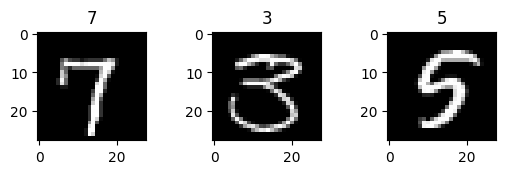

In [123]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [124]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [125]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [126]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [127]:
print(mean_px, std_px)

33.408936 78.67759


In [128]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


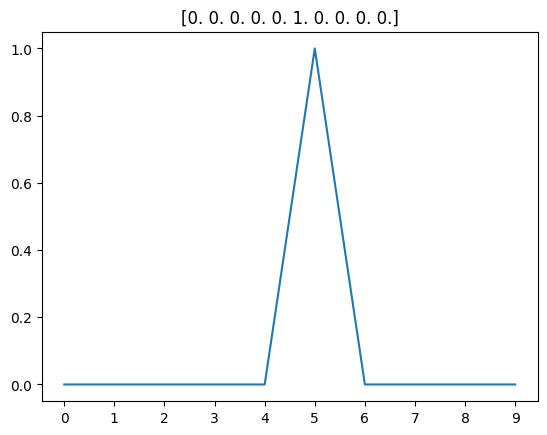

In [129]:
plt.title(y_train[8])
plt.plot(y_train[8])
plt.xticks(range(10));

## Design NN arch

In [130]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [131]:
from keras.models import  Sequential
#import keras.layers
from keras.layers import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [132]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [133]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [134]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
gen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [135]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)
train_gen = gen.flow(X_train, y_train, batch_size=128)

In [105]:
history = model.fit(train_gen, epochs=50, validation_data = (X_val, y_val), verbose=1)

# history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

In [ ]:
#model.summary()

In [107]:
# history_dict = history.history
# history_dict.keys()

In [106]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# epochs = range(1, len(loss_values) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss_values, 'bo')
# # b+ is for "blue crosses"
# plt.plot(epochs, val_loss, 'b+')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# plt.show()

In [ ]:
# #neural network result
# plt.clf()   # clear figure
# epochs = 10
# plt.plot(epochs, accuracy, 'bo', label='Training acc')
# plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

In [ ]:
# plt.clf()   # clear figure
# acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_accuracy']

# plt.plot(epochs, acc_values, 'bo')
# plt.plot(epochs, val_acc_values, 'b+')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [136]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [137]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [138]:
history=fc.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17480\3470111852.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=fc.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10,


524/525 [============================>.] - ETA: 0s - loss: 0.7072 - accuracy: 0.8050WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 8400 batches). You may need to use the repeat() function when building your dataset.


525/525 [==============================] - 25s 43ms/step - loss: 0.7076 - accuracy: 0.8050 - val_loss: 0.5503 - val_accuracy: 0.8389
Epoch 2/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4754 - accuracy: 0.8688
Epoch 3/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4367 - accuracy: 0.8830
Epoch 4/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4222 - accuracy: 0.8890
Epoch 5/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4464 - accuracy: 0.8868
Epoch 6/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4258 - accuracy: 0.8923
Epoch 7/10
525/525 [==============================] - 17s 33ms/step - loss: 0.4115 - accuracy: 0.8936
Epoch 8/10
525/525 [==============================] - 18s 34ms/step - loss: 0.4182 - accuracy: 0.8947
Epoch 9/10
525/525 [==============================] - 18s 34ms/step - loss: 0.4278 - accuracy: 0.8964
Epoch 10/10
525/525 [==============================

In [142]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [143]:
model= get_cnn_model()
model.optimizer.lr=0.01

In [146]:
history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

#history = model.fit(generator=batches, epochs=10, validation_data = (X_val, y_val), verbose=1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17480\2666557561.py", line 4, in <module>
    history = model.fit(generator=batches, epochs=10, validation_data = (X_val, y_val), verbose=1)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'generator'

During handling of the above exception, another exception occurred:

Trace

In [147]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [148]:
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/10
  1/525 [..............................] - ETA: 44s - loss: 2.3017 - accuracy: 0.0156

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17480\975494936.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10,


525/525 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.1109WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 8400 batches). You may need to use the repeat() function when building your dataset.


525/525 [==============================] - 34s 64ms/step - loss: 2.3024 - accuracy: 0.1109 - val_loss: 2.3017 - val_accuracy: 0.1082
Epoch 2/10
377/525 [====================>.........] - ETA: 8s - loss: 2.3022 - accuracy: 0.1108

KeyboardInterrupt: 

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [ ]:
from keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = get_bn_model()
model.optimizer.lr=0.001

In [ ]:
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

# history = model.fit(train_gen, epochs=50, validation_data = (X_val, y_val), verbose=1)

In [ ]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
result = np.argmax(predictions, axis=1)
result = pd.DataFrame(result)
result.head()

In [ ]:
df_test = pd.read_csv('sample_submission.csv')
df_test = pd.concat([df_test, result],axis=1)
df_test = df_test.drop(columns=['Label'])
df_test = df_test.rename(columns = {0:'Label'})
df_test = df_test[['ImageId', 'Label']]
df_test

In [ ]:
df_test.to_csv('submission.csv', index=False)